# <center>PREDICTION</center>

- Random Forest Regressor & ARIMA models were selected for prediction.

## Import The Necessary Libraries

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.2f}'.format

In [44]:
database = pd.read_csv('DATABASE.csv')
del database['Unnamed: 0']
database.head()

,DESCRIPTION,DATE,MONTH,YEAR,CITY,STATE,ZONE,CASUALITIES,NUMBER OF CASUALITIES,EQUIPMENTS,LITERACY,POPULATION,NUMBER OF INCIDENTS,GROWTH IN GDP,INFLATION,TERRORIST GROUP,CLASSIFY
0,1993 blasts: Sanjay Dutt guilty under Arms Act...,2006-11-28,NOVEMBER,2006,---,---,---,No,0,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,167,9.3%,6.7%,DATA NOT AVAILABLE,1
1,Over 300 Stone Pelting Incidents in Kashmir Si...,2019-10-10,OCTOBER,2019,---,Jammu and Kashmir,North,No,0,STONE,68.74,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,1
2,\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\n\r\r\r\r\r...,2007-10-22,OCTOBER,2007,---,---,---,No,0,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,149,9.8%,6.2%,DATA NOT AVAILABLE,0
3,At Least 100 Dead in India Terror Attacks.\r\r...,2008-11-26,NOVEMBER,2008,---,---,---,Yes,100,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,534,3.9%,9.1%,DATA NOT AVAILABLE,1
4,\r\r\r\r\r\r\r\r\nTwo killed in first gun batt...,2019-08-21,AUGUST,2019,---,Jammu and Kashmir,North,Yes,2,gun,68.74,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,1


### Label Encoded Values for States / Union Territory : 

- --- : 0
- Assam : 1
- Delhi : 2
- Gujarat : 3
- Jammu and Kashmir : 4
- Kerala : 5
- Maharashtra : 6
- Manipur : 7
- Puducherry : 8
- Punjab : 9
- Telangana : 10
- Uttar Pradesh : 11

### Lable Encoded Values for Zone :

- --- : 0 
- Central : 1
- North : 2
- North East : 3
- South : 4
- West : 5 

In [50]:
le = LabelEncoder()

database['STATE'].unique()

database['ZONE'].unique()

database['STATE'] = le.fit_transform(database['STATE'])
database['STATE'].unique() 

database['ZONE'] = le.fit_transform(database['ZONE'])
database['ZONE'].unique()

database['CASUALITIES'] = le.fit_transform(database['CASUALITIES'])
database['CASUALITIES'].unique()

array([0, 1])

### Random Forest Algorithm :
- Used for predicting the state most prone to encounter an Anti-National Incident

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
database = database.sort_values('DATE')
database = database.set_index('DATE')

In [53]:
database.head()

,DESCRIPTION,MONTH,YEAR,CITY,STATE,ZONE,CASUALITIES,NUMBER OF CASUALITIES,EQUIPMENTS,LITERACY,POPULATION,NUMBER OF INCIDENTS,GROWTH IN GDP,INFLATION,TERRORIST GROUP,CLASSIFY
DATE,,,,,,,,,,,,,,,,
1992-12-08,AT LEAST 200 KILLED IN INDIA AS MUSLIM-HINDU R...,DECEMBER,1992,---,0,0,1,200,---,DATA NOT AVAILABLE,DATA NOT AVAILABLE,237,5.5%,9.9%,DATA NOT AVAILABLE,1
2006-11-28,1993 blasts: Sanjay Dutt guilty under Arms Act...,NOVEMBER,2006,---,0,0,0,0,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,167,9.3%,6.7%,DATA NOT AVAILABLE,1
2007-10-22,\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\n\r\r\r\r\r...,OCTOBER,2007,---,0,0,0,0,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,149,9.8%,6.2%,DATA NOT AVAILABLE,0
2008-10-30,Dozens Die in Bomb Attacks in Northeast India....,OCTOBER,2008,---,0,0,1,12,BOMB,DATA NOT AVAILABLE,DATA NOT AVAILABLE,534,3.9%,9.1%,DATA NOT AVAILABLE,1
2008-11-26,At Least 100 Dead in India Terror Attacks.\r\r...,NOVEMBER,2008,---,0,0,1,100,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,534,3.9%,9.1%,DATA NOT AVAILABLE,1


In [57]:
x = database.drop(['DESCRIPTION','MONTH','YEAR','CITY','STATE','EQUIPMENTS','NUMBER OF CASUALITIES','LITERACY','POPULATION','NUMBER OF INCIDENTS','GROWTH IN GDP','INFLATION','TERRORIST GROUP'],axis = 1)
y = database['STATE']

- **Features Selected** : ZONE , CASUALITIES , CLASSIFY
- **Target Variable** : STATE

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25) 

RF = RandomForestRegressor(n_estimators = 1)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1)

In [59]:
pred = RF.predict(x_test)
pred = np.round(pred)
pred

array([ 4.,  0.,  2.,  6.,  4.,  0.,  4., 11.,  6.,  1.,  0.,  0.,  0.,
        4.,  5.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  4.,  0.,  4.])

In [60]:
y_pred  = np.array(y_test)
y_pred

array([ 4,  0,  2,  6,  4,  0,  4, 11, 10,  1,  0,  0,  0,  4, 10,  0,  0,
        0,  2,  0,  0,  0,  4,  0,  4])

### Auto Regressive Integrated Moving Average :
- Used for predicting the number of casualities in an Anti-National Incident

#### Functions for Plotting Timeseries Data : 

In [71]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [70]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

- Selecting data which has encountered an Anti-National Incident  

In [64]:
data = database[database['CLASSIFY'] == 1]
data.head()

,DESCRIPTION,MONTH,YEAR,CITY,STATE,ZONE,CASUALITIES,NUMBER OF CASUALITIES,EQUIPMENTS,LITERACY,POPULATION,NUMBER OF INCIDENTS,GROWTH IN GDP,INFLATION,TERRORIST GROUP,CLASSIFY
DATE,,,,,,,,,,,,,,,,
1992-12-08,AT LEAST 200 KILLED IN INDIA AS MUSLIM-HINDU R...,DECEMBER,1992,---,0,0,1,200,---,DATA NOT AVAILABLE,DATA NOT AVAILABLE,237,5.5%,9.9%,DATA NOT AVAILABLE,1
2006-11-28,1993 blasts: Sanjay Dutt guilty under Arms Act...,NOVEMBER,2006,---,0,0,0,0,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,167,9.3%,6.7%,DATA NOT AVAILABLE,1
2008-10-30,Dozens Die in Bomb Attacks in Northeast India....,OCTOBER,2008,---,0,0,1,12,BOMB,DATA NOT AVAILABLE,DATA NOT AVAILABLE,534,3.9%,9.1%,DATA NOT AVAILABLE,1
2008-11-26,At Least 100 Dead in India Terror Attacks.\r\r...,NOVEMBER,2008,---,0,0,1,100,---,DATA NOT AVAILABE,DATA NOT AVAILABLE,534,3.9%,9.1%,DATA NOT AVAILABLE,1
2008-12-19,10 biggest national security failures.Security...,DECEMBER,2008,Amritsar,9,2,0,0,---,76.68,2490891,534,3.9%,9.1%,DATA NOT AVAILABLE,1


In [69]:
col = list(data.columns)
col.remove('NUMBER OF CASUALITIES')

df = data.drop(columns = col)
df.head()

,NUMBER OF CASUALITIES
DATE,
1992-12-08,200
2006-11-28,0
2008-10-30,12
2008-11-26,100
2008-12-19,0


In [76]:
df['NUMBER OF CASUALITIES'] = df['NUMBER OF CASUALITIES'].apply(pd.to_numeric)

#### Stationarity Test : 

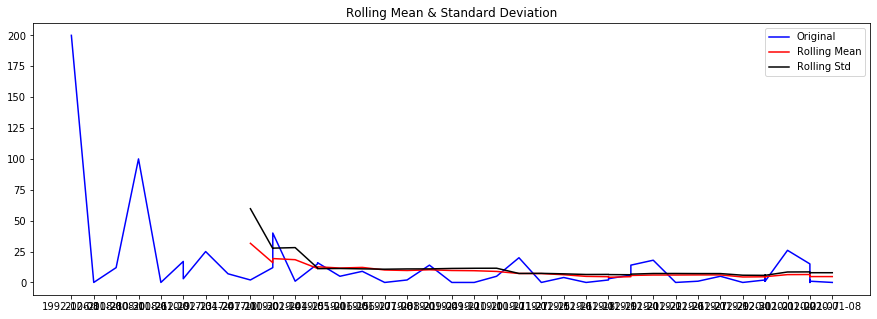

Results of Dickey-Fuller Test:
Test Statistic                -2.24
p-value                        0.19
#Lags Used                    11.00
Number of Observations Used   38.00
Critical Value (1%)           -3.62
Critical Value (5%)           -2.94
Critical Value (10%)          -2.61
dtype: float64


In [79]:
test_stationarity(df)

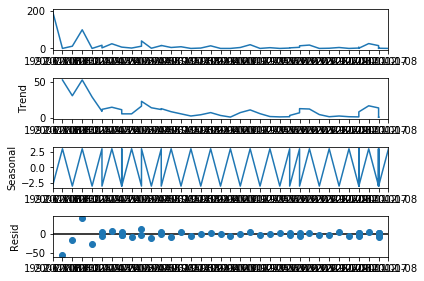

In [87]:
dec = sm.tsa.seasonal_decompose(df,period = 2)
dec.plot()
plt.show()

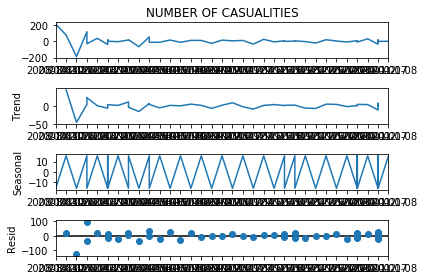

In [96]:
df_diff = df.diff()
df_diff = df_diff.dropna()
dec = sm.tsa.seasonal_decompose(df_diff,period = 2)
dec.plot()
plt.show()

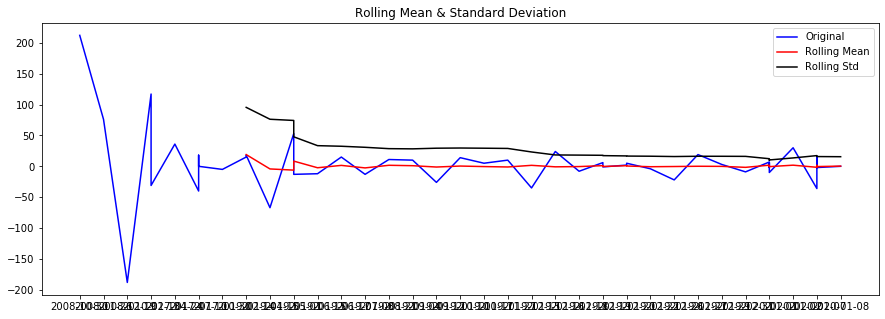

Results of Dickey-Fuller Test:
Test Statistic                -3.73
p-value                        0.00
#Lags Used                     8.00
Number of Observations Used   39.00
Critical Value (1%)           -3.61
Critical Value (5%)           -2.94
Critical Value (10%)          -2.61
dtype: float64


In [97]:
test_stationarity(df_diff)

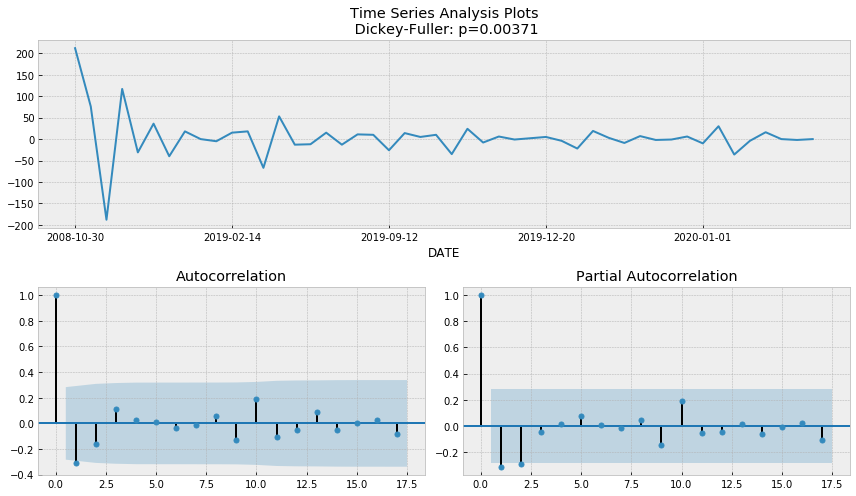

In [101]:
tsplot(df_diff)

In [104]:
df = df.dropna()

In [105]:
model = ARIMA(df,order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D.NUMBER OF CASUALITIES   No. Observations:                   48
Model:                      ARIMA(2, 1, 2)   Log Likelihood                -221.833
Method:                            css-mle   S.D. of innovations             21.977
Date:                     Wed, 05 Aug 2020   AIC                            455.666
Time:                             21:05:38   BIC                            466.893
Sample:                                  1   HQIC                           459.909
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1297      0.068      1.914      0.056      -0.003       0.263
ar.L1.D.NUMBER OF CASUALITIES    -

In [111]:
df.head()

DATE
2006-11-28   -200.00
2008-10-30     12.00
2008-11-26     88.00
2008-12-19   -100.00
2010-02-13     17.00
Name: NUMBER OF CASUALITIES, dtype: object

E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


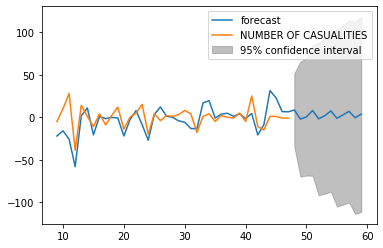

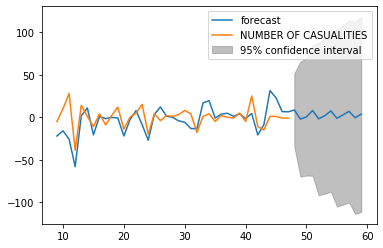

In [113]:
model_fit.plot_predict(start = 10,end = 60)

- **MAE** : 18
- The data scraped was inconsistent and did affect the result.

# <center>END</center>